In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from inference.cmb_ps import CMBPS, get_camb_ps
from inference.utils import sample_prior_phi, unnormalize_phi

In [2]:
device = 0

In [3]:
ps_model = CMBPS(norm_input_phi='compact').to(device)

In [4]:
phi_fid = torch.tensor([0.5, 0.5]).to(device) # Center of prior
ps = ps_model(phi_fid).cpu().numpy()[0]

ps_camb = get_camb_ps(unnormalize_phi(phi_fid).cpu().numpy())

In [5]:
a = np.log(ps_camb).mean()
b = np.log(ps_camb).std()

In [6]:
def ps_renormalize(ps): # David changed something in his model, so this is needed for this notebook now
    ps = np.log(ps)
    ps = (ps - ps.mean()) / ps.std()
    ps = ps * b + a
    ps = np.exp(ps)
    return ps

In [7]:
ps = ps_renormalize(ps)

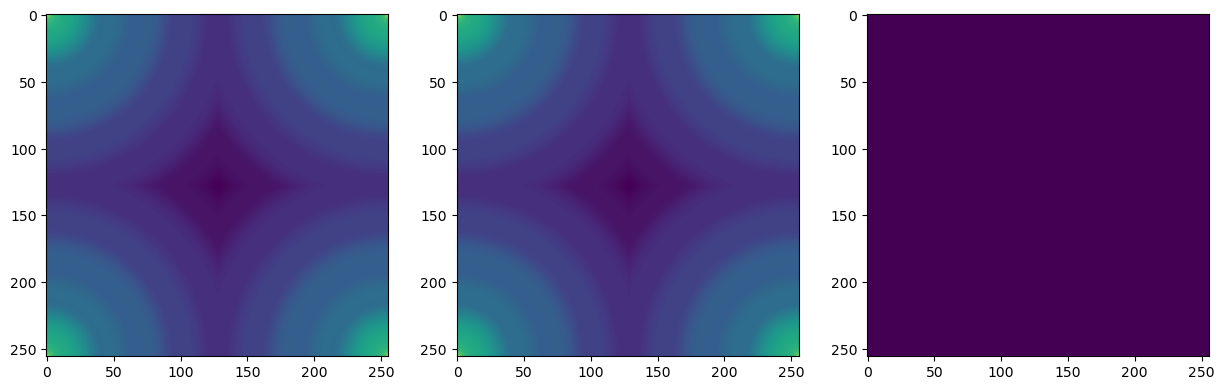

In [8]:
vmin, vmax = np.min(np.log(ps)), np.max(np.log(ps))
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(np.log(ps), vmin=vmin, vmax=vmax)
axs[1].imshow(np.log(ps_camb), vmin=vmin, vmax=vmax)
axs[2].imshow(np.abs(np.log(ps) - np.log(ps_camb)), vmin=vmin, vmax=vmax)
plt.show()

In [9]:
np.log(ps) - np.log(ps_camb)

array([[-0.00052866,  0.16499402,  0.11183322, ...,  0.01685219,
         0.11183322,  0.16499402],
       [ 0.16499402, -0.00028842,  0.10385393, ...,  0.02807918,
         0.10385393, -0.00028842],
       [ 0.11183322,  0.10385393, -0.00052039, ...,  0.03547648,
        -0.00052039,  0.10385393],
       ...,
       [ 0.01685219,  0.02807918,  0.03547648, ..., -0.00065388,
         0.03547648,  0.02807918],
       [ 0.11183322,  0.10385393, -0.00052039, ...,  0.03547648,
        -0.00052039,  0.10385393],
       [ 0.16499402, -0.00028842,  0.10385393, ...,  0.02807918,
         0.10385393, -0.00028842]])

In [10]:
phi = sample_prior_phi(10, device=device)
ps = ps_renormalize(ps_model(phi).cpu().numpy())

ps_camb = np.zeros_like(ps)
for i in range(ps.shape[0]):
    ps_camb[i] = get_camb_ps(unnormalize_phi(phi[i]).cpu().numpy())

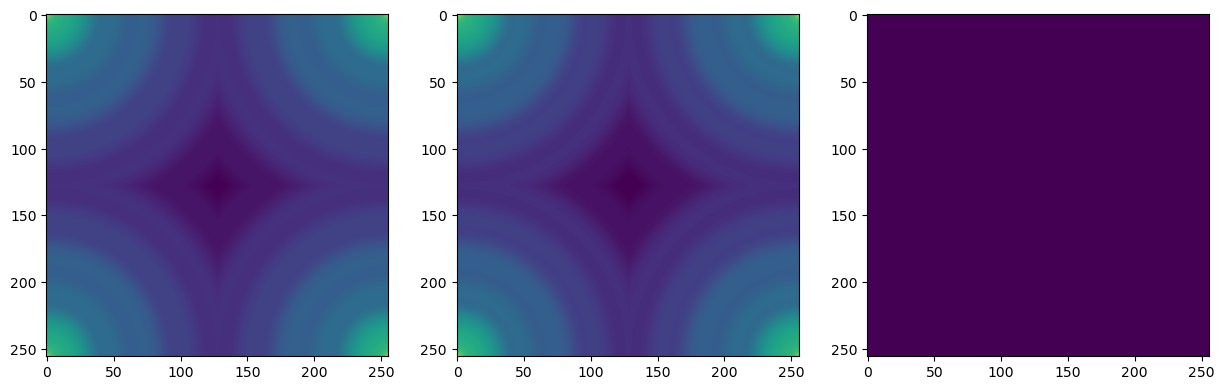

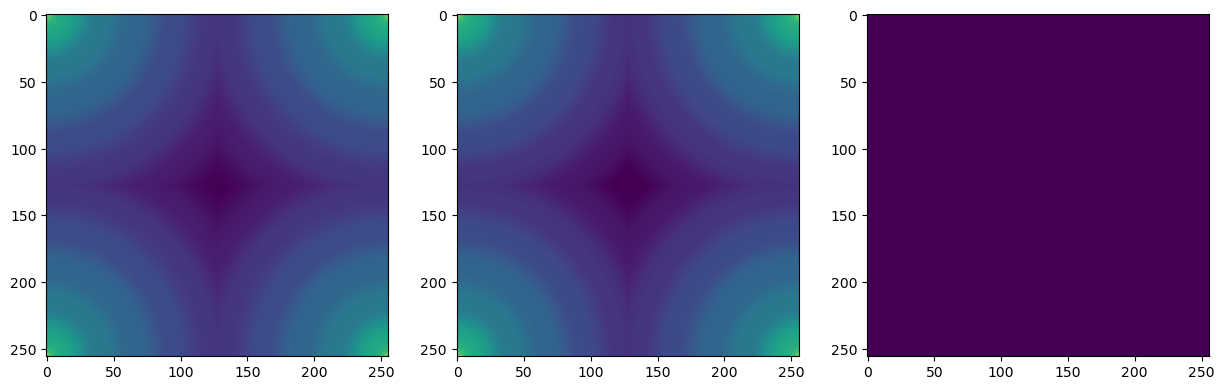

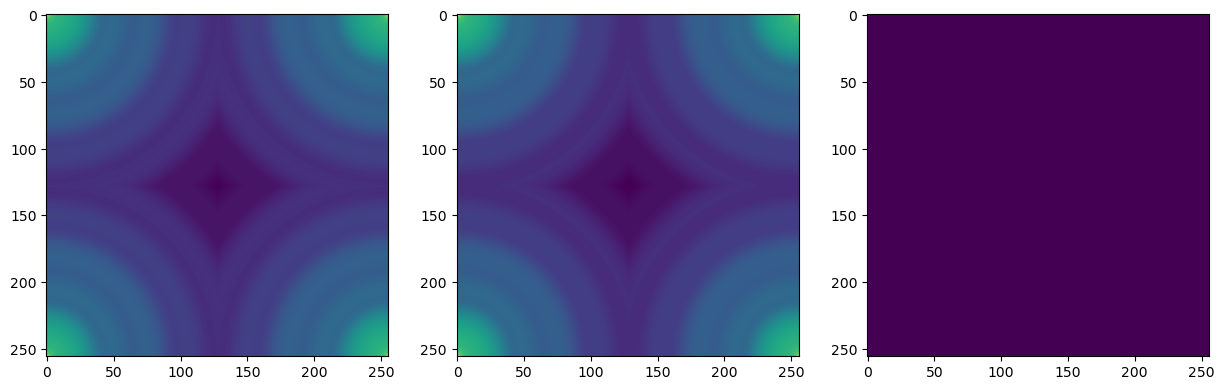

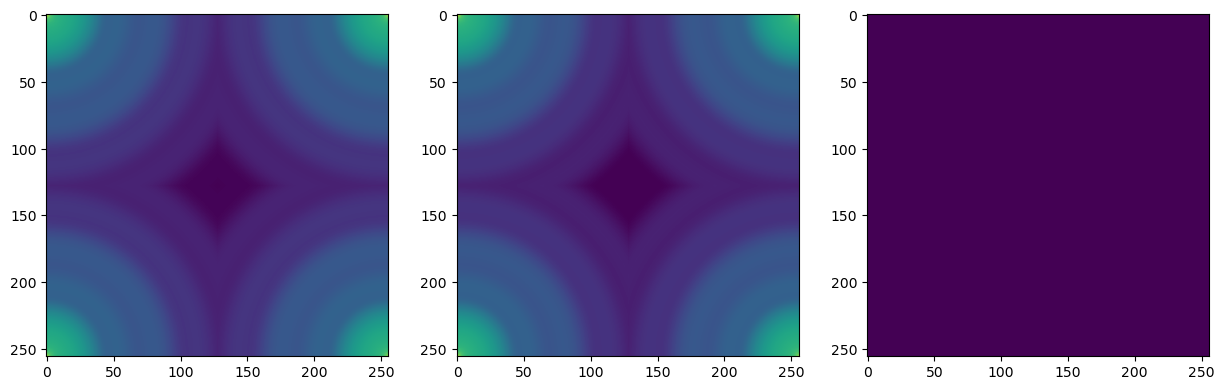

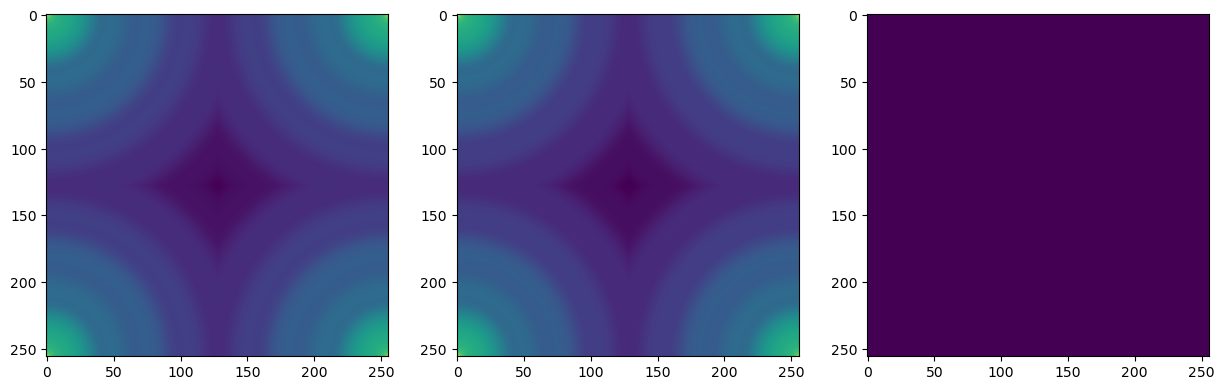

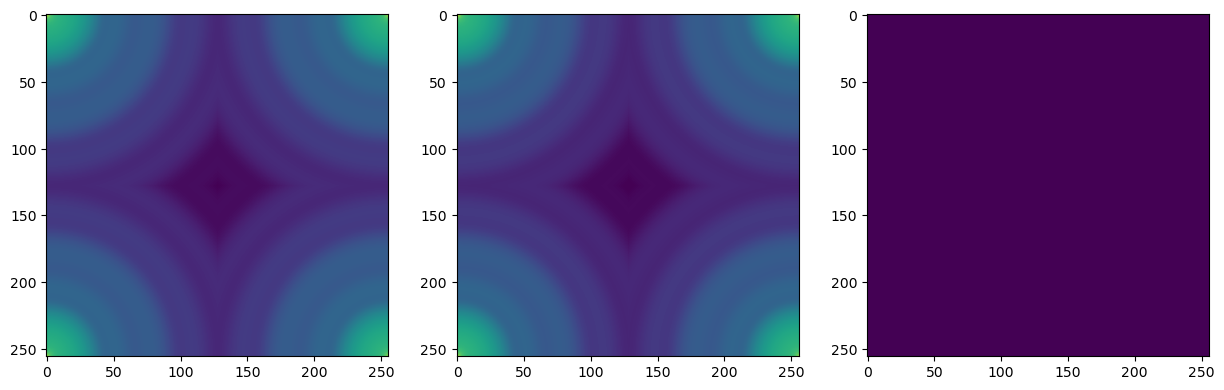

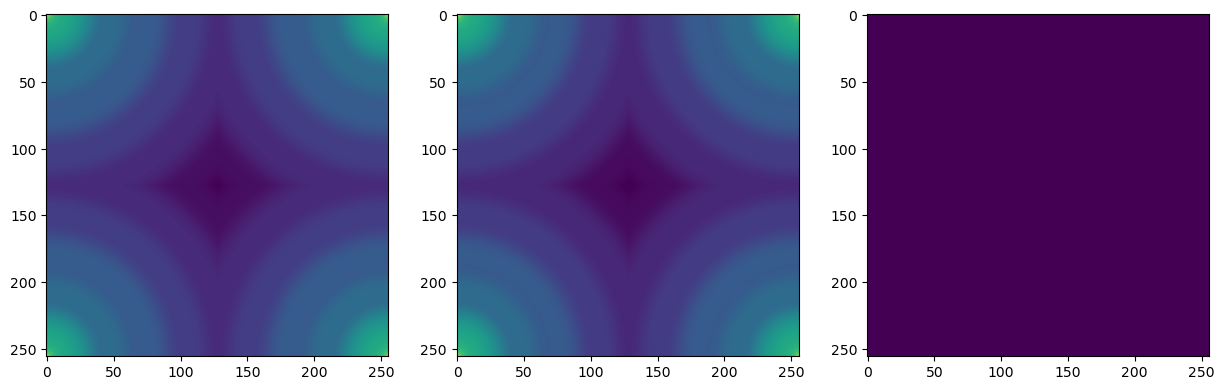

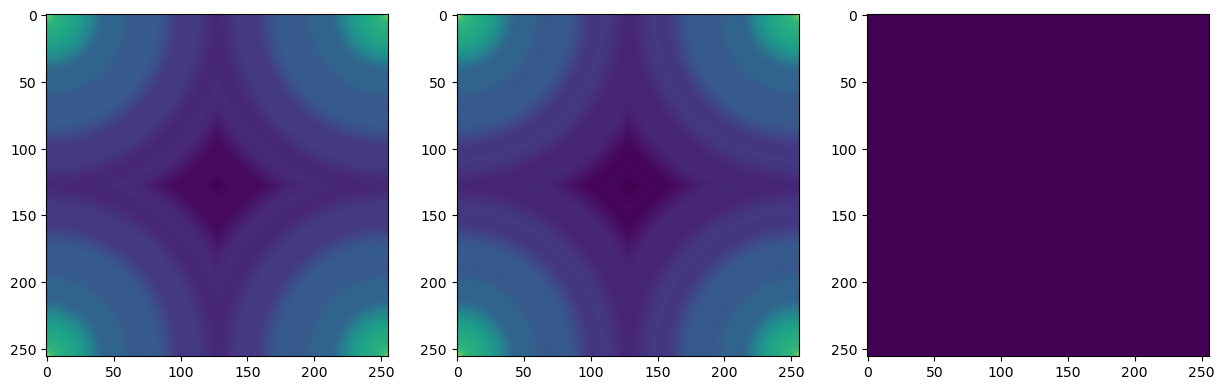

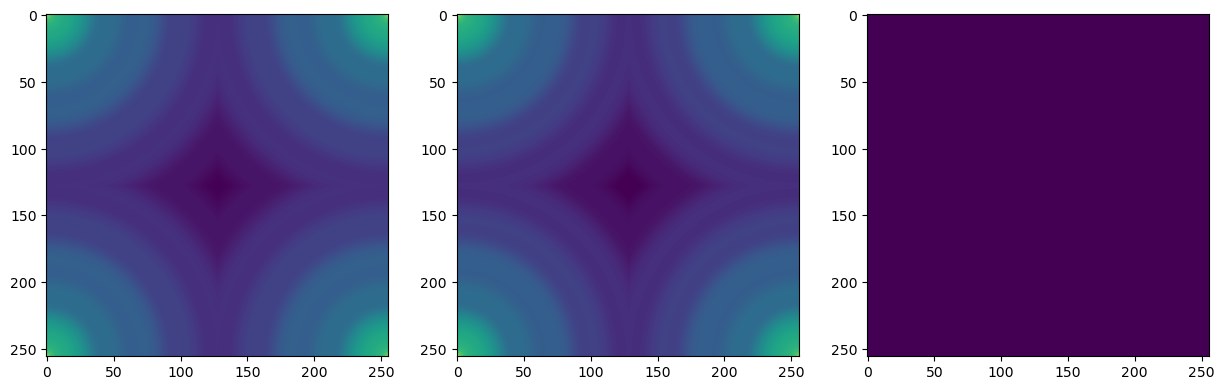

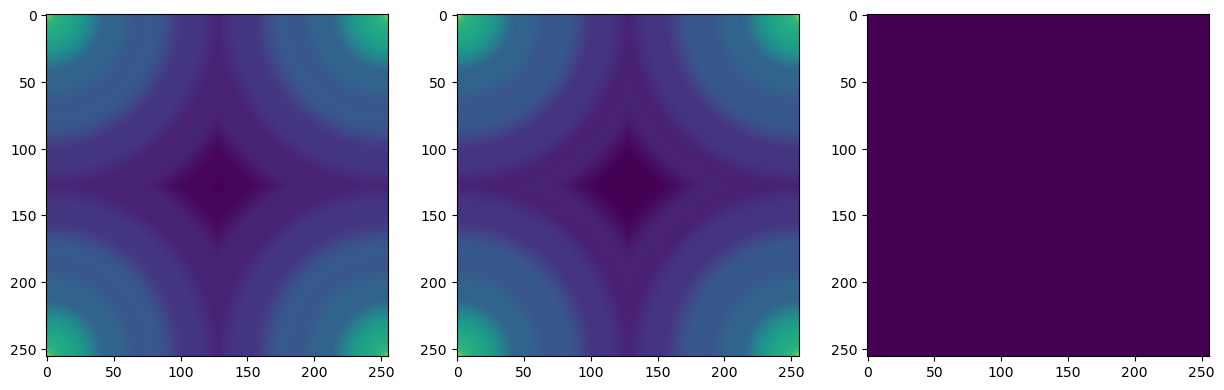

In [11]:
for i in range(ps.shape[0]):
    vmin, vmax = np.min(np.log(ps[i])), np.max(np.log(ps[i]))
    fig, axs = plt.subplots(1, 3, figsize=(15,5))
    axs[0].imshow(np.log(ps[i]), vmin=vmin, vmax=vmax)
    axs[1].imshow(np.log(ps_camb[i]), vmin=vmin, vmax=vmax)
    axs[2].imshow(np.abs(np.log(ps[i]) - np.log(ps_camb[i])), vmin=vmin, vmax=vmax)
    plt.show()